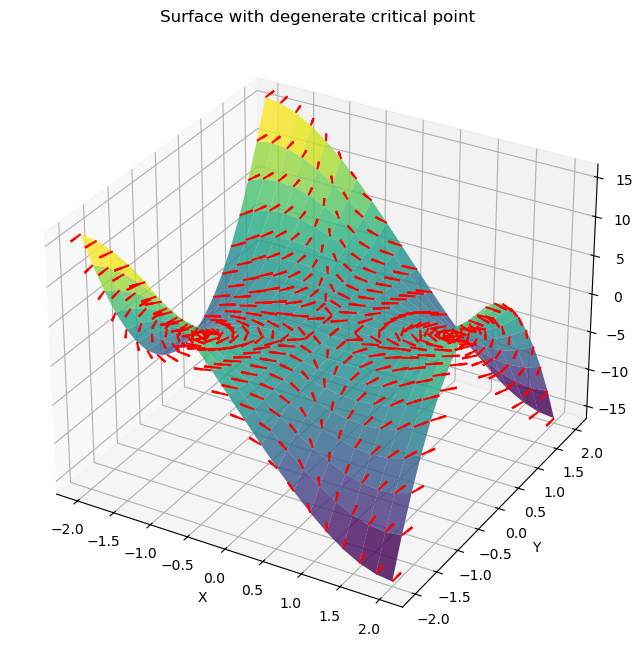

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return x**3 - 3*x*y**2

# Define the gradient of the function
def gradient_f(x, y):
    df_dx = 3*x**2 - 3*y**2  # Partial derivative with respect to x
    df_dy = -6*x*y           # Partial derivative with respect to y
    return df_dx, df_dy

# Create a grid of points
x = np.linspace(-2, 2, 20)  # Sparse grid for vector field
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Compute the gradient
df_dx, df_dy = gradient_f(X, Y)

# Plot the surface with gradient flow lines
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Plot the gradient flow lines (quiver)
ax.quiver(X, Y, Z, df_dx, df_dy, np.zeros_like(Z), color='red', length=0.2, normalize=True, arrow_length_ratio=0.5)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface with degenerate critical point')
plt.savefig("saddle_plot.pdf")
plt.show()

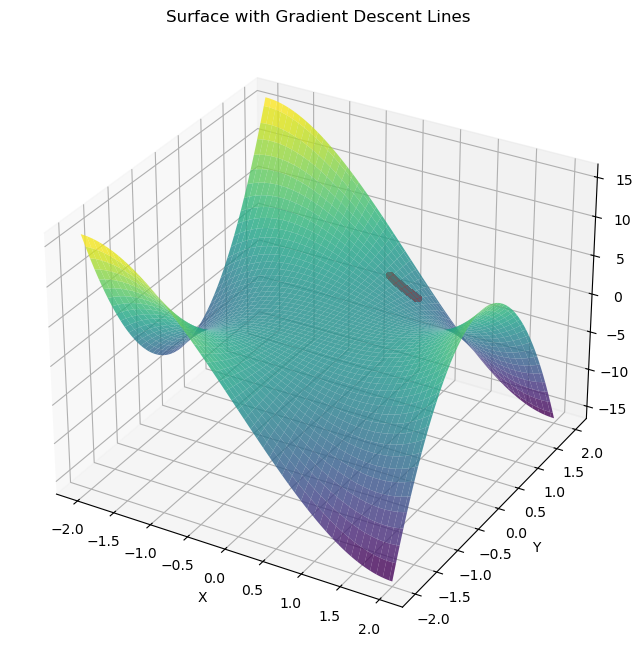

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function with a small regularization term
def f(x, y):
    return x**3 - 3*x*y**2 + 0.00001*x**2  # Added small regularization term

# Define the gradient of the function
def gradient_f(x, y):
    df_dx = 3*x**2 - 3*y**2 + 0.00002*x  # Partial derivative with respect to x
    df_dy = -6*x*y                       # Partial derivative with respect to y
    return df_dx, df_dy

# Gradient descent function
def gradient_descent(start_point, learning_rate, num_steps):
    x, y = start_point
    trajectory = [(x, y, f(x, y))]  # Store the trajectory (x, y, z)
    
    for _ in range(num_steps):
        df_dx, df_dy = gradient_f(x, y)
        x -= learning_rate * df_dx  # Update x
        y -= learning_rate * df_dy  # Update y
        
        # Clip x and y to prevent overflow
        x = np.clip(x, -10, 10)
        y = np.clip(y, -10, 10)
        
        trajectory.append((x, y, f(x, y)))  # Append new point to trajectory
    
    return np.array(trajectory)

# Create a grid of points for the surface
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Parameters for gradient descent
start_points = [(0,1.5)]  # Multiple starting points
learning_rate = 0.000001  # Reduced learning rate
num_steps = 50000

# Plot the surface with gradient descent lines
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Plot gradient descent lines for each starting point
for start_point in start_points:
    trajectory = gradient_descent(start_point, learning_rate, num_steps)
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color='red', linewidth=2, marker='o', markersize=4)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface with Gradient Descent Lines')

plt.show()

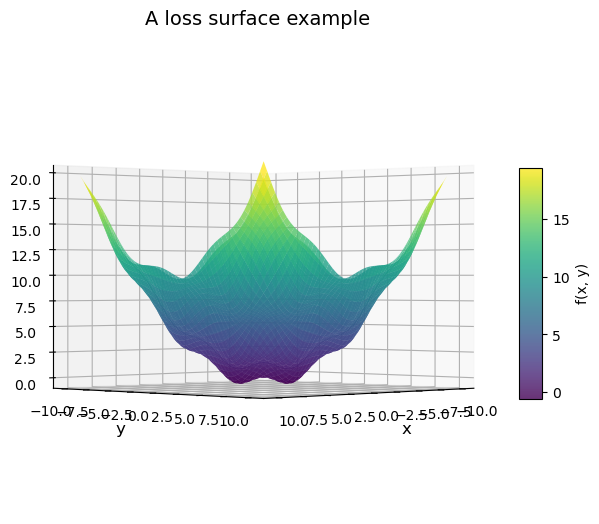

In [40]:
# Define the function (sum of cosine functions)
def f(x, y):
    return  np.sin(x) * np.sin(y) + 0.1 * (x**2 + y**2)  # Many global minima, no local maxima

# Create a grid of x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create the plot
plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none", alpha=0.8)

# Add a color bar
plt.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label="f(x, y)")

# Add labels and title
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("f(x, y)", fontsize=12)
ax.set_title("A loss surface example", fontsize=14, pad=20)
plt.savefig("loss_surface", dpi=300)
ax.view_init(elev=0, azim=45)
# Show the plot
plt.savefig("loss_surface", dpi=300)
plt.show()